<h1>Algoritmo HHL para la resolución de sistemas de ecuaciones lineales.</h1>

<h2>1. Introducción</h2>

<text>Todos recordamos del colegio o de algunas asignaturas de matemáticas de la carrera qué era un sistema de  ecuaciones lineales y su forma.</text>

<img src="sisecu.jpeg">

<text>Se ha demostrado que el algoritmo HHL es mucho más eficiente que cualquier algoritmo clásico pero bajo una serie de restricciones en el procedimiento. Este algoritmo ha sido desarrollado por Aram Harrow(H), Avinatan Hassidim(H) y Seth Lloyd(L) y presentado en 2009, pero no fue implementado hasta 2013 y finalmente se demostró su funcionamiento y su eficiencia en 2018.</text>

<text>Este algoritmo trata de dar una solución más rápida respecto utilizando computadores cuánticos respecto a los clásicos. Debemos comprender que para resolver estos sistemas de ecuaciones debemos transformar la forma que hemos visto anteriormente a la siguiente:
</text>

<h3>$$A\vec{x}=\vec{b}$$</h3>

<text>Ser consciente de las restricciones de este algoritmo es de vital importancia para comprenderlo. $A$ se trata de una matriz invertible y hermitiana, esta última característica quiere decir que se trata de una matriz que coincide con su matriz transpuesta conjugada. Además $\vec{b}$ se trata de un vector unitario. Vamos a tratar esta fórmula con el lenguaje correspondiente:</text>

<h3>$$A|x⟩=|b⟩$$</h3>

<h2>2. Preparación para el Algoritmo HHL.</h2>

<text>Si $A$ es hermítica podemos realizar las siguientes descomposiciones. La fórmula se traduce en la suma de los autovalores por el producto interno de los autovectores. Los autovectores forman una base ortonormal en el espacio en el que trabajamos, es decir, podemos descomponer cualquier estado por una combinación lineal de los autovectores, es decir, podemos descomponer b en la siguiente fórmula.</text>

<h3>$$A=\sum_{i}\lambda_i \left| u_i \right\rangle \left\langle u_i \right|$$</h3>

<h3>$$\left| b \right\rangle = \sum_{i}b_i \left| u_i \right\rangle$$</h3>

<text>Como $A$ es invertible podemos coger la primera fórmula y desarrollarla para sacar $A^{-1}.$</text>

<h3>$$A^{-1}=\sum_{i}\frac{1}{\lambda_i} \left| u_i \right\rangle \left\langle u_i \right|$$</h3>

<text>Por tanto, si queremos despejar $|x⟩$ en la fórmula original $A|x⟩=|b⟩$, debemos aplicar las igualdades anteriores quedando así la fórmula $|x⟩=A^{-1}|b⟩$ y en cosnsecuencia la siguiente sentencia:</text>

<h3>$$\left| x \right\rangle=\sum_{i}\frac{b_i}{\lambda_i} \left| u_i \right\rangle$$</h3>

<h3>2.1. Autovalores y Autovectores de $A$.</h3>

<text>Para comprender mejor el desarrollo del algoritmo voy a explicar primero que son los autovalores y los autovectores. El autovector de una matriz $A$ es aquel que multiplicado por $A$ nos resulta un autovalor de $A$ por el mismo autovector.</text>

<h3>$$A\vec{v}=\lambda\vec{v}$$</h3>

<text>$A$: matriz.           $\vec{v}$: autovector.         $\lambda$: autovalor.
    
</text>

<b>Ejemplo</b>

$\begin{pmatrix} 0& 1 \\1& 0\\ \end{pmatrix}$
$\begin{pmatrix}1 \\-1\\ \end{pmatrix}$
$=
-1$
$\begin{pmatrix}1 \\-1\\\end{pmatrix}$

<h3>2.2. Quantum Phase Estimation (QPE).</h3>

<text>Antes de desarrollar el algoritmo debemos saber qué es la Quantum Phase Estimation(QPE). Se trata de una subrutina muy utilizada en los algoritmos cuánticos junto con la QFT. El QPE es una analogía cuántica del cálculo de autovalores y autovectores de una matriz.</text>

<h3>$$U|\varphi⟩=\lambda|\varphi⟩$$</h3>

<text>Debido a que la norma de los autovalores es 1 debido a que trabajamos con matrices unitarias(qubits, puertas cuánticas...), podemos representar $\lambda$ como $e^{2\pi i \theta}$. Debemos saber que $|\varphi⟩$ es la fase cuando trabajamos con números complejos.</text>

<img src="qpe.png">

<text>El QPE se encarga de resolver esto, de sacar lo que vale $|\varphi⟩$. Por eso es tan importante conocer mínimamente lo que hace el QPE para desarrollar el HHL.</text>

<h2>3. Desarrollo matemático del Algoritmo HHL.</h2>

<img src="hhlcircuit.png">

<h3>3.1. Carga de $|b⟩$.</h3>

<text>Debemos cargar $|b⟩$ que va a ser nuestra entrada. Como hemos visto enteriormente, podemos desarrollar $|b⟩$ como:</text>

<h3>$$\left| b \right\rangle = \sum_{i}b_i \left| u_i \right\rangle$$</h3>

<h3>3.2. Aplicamos QPE.</h3>

<h3>$$U =e^{iAt}:= \sum_{j}e^{i\lambda_{j}t} \left| u_j \right\rangle \left\langle u_i \right|$$</h3>

<text>Sabemos que A es hermitiana y que sus datos son los siguientes: </text>

<text>Autovalores de A: 
    </text><h3>$\left\{ \lambda_{1},...,\lambda_{N} \right\}
    \rightarrow \left\{ e^{i\lambda_{1}},...,e^{i\lambda_{1}} \right\}$
    </h3>

<text>Autovectores de A: 
    </text><h3>$\left\{ \left| u_1 \right\rangle ,...,\left| u_N \right\rangle\right\} $</h3>

<text>Nos queda de la siguiente manera:</text>

<h3>$$\sum_{j}b_{i} \left| u_j \right\rangle \left| \lambda_j \right\rangle$$</h3>

<h3>3.3. Inversión y rotación por $\lambda$</h3>

<h3>$$\sum_{j=0}^{N-1}b_j\left| \lambda_j \right> \left| u_j \right> \left ( \sqrt{1-\frac{C^2}{\lambda_j^2}} \left| 0 \right> + \frac{C}{\lambda_j} \left| 1 \right>\right )$$</h3>

<text>$C$ es una constante de normalización.</text>

<h3>3.4. Inversión y post-elección.</h3>

<text>La post-selección se trata de medir el estado y seleccionar según la salida. En nuestro caso si sale 1 continuamos, si sale 0 reiniciamos nuestros pasos de nuevo. Cuando observamos ese 1 obtenemos el estado siguiente:</text>

<h3>$$K\sum_{j=0}^{N-1}\frac{b_j}{\lambda_j}\left|u_i \right> \left|\frac{1}{\lambda_j} \right>$$</h3>

<text>Para poder decir:</text>

<h3>$$\left|x \right> = K\sum_{j=0}^{N-1}\frac{b_j}{\lambda_j}\left|u_i \right> \left|\frac{1}{\lambda_j} \right>$$</h3>

<h3>3.5. Aplicamos la QPE inversa e inversión.</h3>

<text>No debería haber ningún tipo de entrelazamiento entre para que el algoritmo funcione y aún así se está produciendo.</text>

<h3>$$K\sum_{j=0}^{N-1}\frac{b_j}{\lambda_j}\left|u_i \right>$$</h3>

<h2>4. Operador Inversión.</h2>

<text> Ya hemos visto un poco de qué va la QPE y lo importante que es para nuestro circuito. Pero aún debemos saber qué es y cómo funciona el operador inversión que hemos mencionado. Matemáticamente hemos distinguido la inversión de nuestro estado de la rotación, pero en qiskit todo el paso de invertir-rotar-desinvertir, se hace en un mismo módulo. Este operador no se suele programar de manera eficiente y tampoco lo haremos nosotros. Se trata de una puerta que se representa así:</text>

<h3>$$Ry(2\theta) = \begin{pmatrix} cos\theta & -sen\theta \\ sen\theta & cos\theta\\ \end{pmatrix}$$</h3>

<text>Si sometemos un qubit a esta puerta, provocaremos una rotación del estado del qubit en función de lo que digamos que valga $\theta$. Decimos que no es un operador eficiente porque utiliza $n(2^{n})$ puertas Toffoli y es muy costoso.</text>

<text>Si queremos programar de forma eficiente este operador podemos hacer un circuito de n qubits, y someter cada uno a una puerta de control, de tal manera que, si el $q_0$ está a $1$ haremos una rotación de 1, si el $q_1$ está a $1$, rotamos a un medio el estado, si el $q_2$ está a $1$, haremos una rotación de un cuarto, y así sucesivamente.
    El problema de esta optimización es que con las inversas de los números no podemos operar correctamente.<text>

<h2>5. Programación e implementación del Algoritmo HHL.</h2>

<b>1. Nuestro primer paso es importar las librerías necesarias: </b><text>Numpy para realizar operaciones vectoriales y linear_solver para la resolución de sistemas lineales. Declaramos también nuestra matriz hermítica, $\left|b \right>$ y la solución.</text>

In [6]:
import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
matriz = np.array([[1, -1/3], [-1/3, 1]])r
vector = np.array([1, 0])
solucion_ingenua = HHL().solve(matriz, vector)
solucion_clasica = NumPyLinearSolver().solve(matriz, vector / np.linalg.norm(vector))

In [7]:
print('classical state:', solucion_clasica.state)

classical state: [1.125 0.375]


In [9]:
print('naive state:')
print(naive_hhl_solution.state)

naive state:
      ┌────────────┐┌──────┐        ┌─────────┐
  q4: ┤ circuit-85 ├┤3     ├────────┤3        ├
      └────────────┘│      │┌──────┐│         │
q5_0: ──────────────┤0     ├┤2     ├┤0        ├
                    │  QPE ││      ││  QPE_dg │
q5_1: ──────────────┤1     ├┤1     ├┤1        ├
                    │      ││  1/x ││         │
q5_2: ──────────────┤2     ├┤0     ├┤2        ├
                    └──────┘│      │└─────────┘
  q6: ──────────────────────┤3     ├───────────
                            └──────┘           


In [11]:
print('classical Euclidean norm:', solucion_clasica.euclidean_norm)
print('naive Euclidean norm:', solucion_ingenua.euclidean_norm)

classical Euclidean norm: 1.1858541225631423
naive Euclidean norm: 1.1858541225631376


{'00': 532, '11': 492}
            ┌───┐                      
q77_0: ─────┤ H ├────────■─────────────
       ┌────┴───┴─────┐┌─┴─┐     ┌─┐   
q77_1: ┤ U1(-0.88608) ├┤ X ├──■──┤M├───
       ├─────────────┬┘└───┘┌─┴─┐└╥┘┌─┐
q77_2: ┤ U1(-1.3694) ├──────┤ X ├─╫─┤M├
       └─────────────┘      └───┘ ║ └╥┘
 c7: 2/═══════════════════════════╩══╩═
                                  0  1 


/tmp/ipykernel_1940/1948563154.py:22: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(-beta, q[1])
/tmp/ipykernel_1940/1948563154.py:23: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(-alpha, q[2])


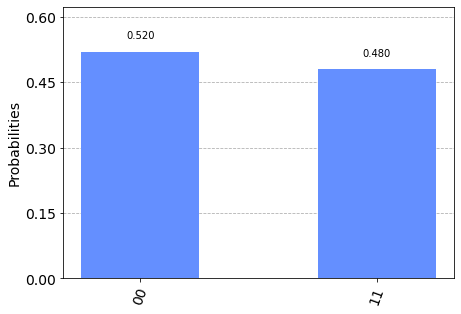

In [15]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
#from qiskit.aqua.components.initial_states import Custom

# Define la matriz de entrada A y el vector b
A = np.array([[1, 0], [0, 2]])
b = np.array([1, 1])

# Calcula los parámetros necesarios
theta = np.arcsin(np.linalg.norm(b) / np.linalg.norm(np.dot(A, b)))
alpha = 2 * theta
beta = np.arccos(np.sqrt(np.max(np.linalg.eigvals(A))) / np.linalg.norm(A))

# Crea el circuito cuántico
q = QuantumRegister(3)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# Añade la transformada de Fourier cuántica (QFT)
qc.h(q[0])
qc.u1(-beta, q[1])
qc.u1(-alpha, q[2])
qc.cx(q[0], q[1])
qc.cx(q[1], q[2])

# Realiza la medición
qc.measure(q[1], c[0])
qc.measure(q[2], c[1])

# Ejecuta el circuito
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()


# Imprime los resultados
counts = result.get_counts(qc)
print(counts)
print(qc)
plot_histogram(counts)
